# Team Project 1 - MATH 420
## James Boggs and Camilo Velez R
### NYC Covid Data

In [2]:
# activate env and instantiate pkgs
using Pkg
Pkg.activate("../p1")
Pkg.instantiate()

  Activating project at `c:\Users\jdbog\Documents\GitHub\m420p1\p1`


In [3]:
using CSV, DataFrames, Dates # import necessary pkgs

In [4]:
df = CSV.read("../resources/data.csv", DataFrame) # entire df

v_infected = values(df[1, 13:end]) # vector of infected numbers
infected_dates = names(df[1, 13:end]) # vector of infected_dates
@assert length(v_infected) == length(infected_dates)

# Exercise 1

## 1)

In [147]:
findfirst([x>=5 for x in v_infected])

46

$T_{0} = 46$

## 2)

In [149]:
vt = values(df[1, 13+46:13+46+120-1]);
@show length(vt)

length(vt) = 120


120

In [151]:
I(t:: Int) = vt[t+1] # define I(t)

I (generic function with 1 method)

In [153]:
Nmax = df.Population[1];
Nmin = vt[end] + 1;
@show Nmax, Nmin

(Nmax, Nmin) = (1628706, 27717)


(1628706, 27717)

### a)

#### ii)

In [154]:
f1(t::Int, n::Int) = t*log((I(t)*(n - I(0))) / (I(0)*(n - I(t))))

f1 (generic function with 1 method)

In [155]:
tmax = 119;
β̂_min = 6/(tmax*(tmax+1)*(2tmax+1))*(sum(x -> f1(x, Nmin), 1:tmax))

0.13807405982926169

In [156]:
β̂_max = 6/(tmax*(tmax+1)*(2tmax+1))*(sum(x -> f1(x, Nmax), 1:tmax))

0.10515569276026039

Values for estimated $\beta$:
* For $N_{max}: \hat{\beta} \approx 0.105$
* For $N_{min}: \hat{\beta} \approx 0.138$

In [157]:
beta = Dict(Nmin=> β̂_min, Nmax => β̂_max)

Dict{Int64, Float64} with 2 entries:
  27717   => 0.138074
  1628706 => 0.105156

In [158]:
j_helper(t, n) = (beta[n]*t - log(I(t)/(n - I(t))) + log(I(0)/(n - I(0))))^2
j_helper(t, n, b) = (b*t - log(I(t)/(n - I(t))) + log(I(0)/(n - I(0))))^2
J(n::Int) = sum(x -> j_helper(x, n), 0:tmax)
J(n::Int, beta::Real) = sum(x -> j_helper(x, n, beta), 0:tmax)

J (generic function with 2 methods)

In [159]:
for x in 1:tmax
    try
        j_helper(x, Nmin)
    catch DomainError
        @show x
    end
end

In [160]:
J(Nmin)

874.1086923318926

In [161]:
J(Nmax)

1078.5175521773804

$J(\beta, N)$:
* For $N_{max}: J(\beta, N) \approx 874.109$:
* For $N_{min}: J(\beta, N) \approx 1078.517$:

#### ii)

In [162]:
using Plots

In [163]:
function predict1(n::Int, t::Int)
    (n*I(0))/(I(0) + (n - I(0))*exp(-beta[n]*t))
end
function predict1(n::Int, t::Int, beta::Real)
    (n*I(0))/(I(0) + (n - I(0))*exp(-beta*t))
end

predict1 (generic function with 2 methods)

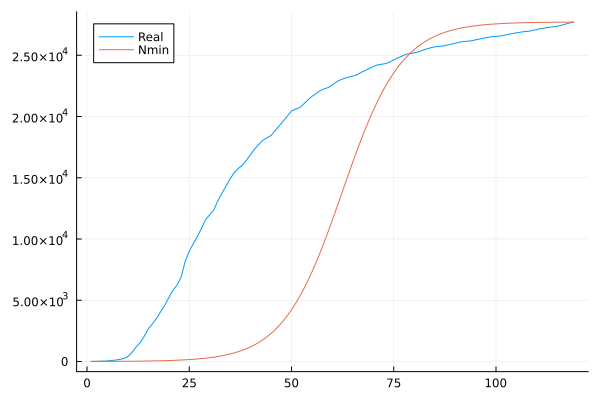

In [165]:

plot(1:tmax, [I.(1:tmax), [predict1(Nmin, x) for x in 1:tmax]], 
label = ["Real" "Nmin"])

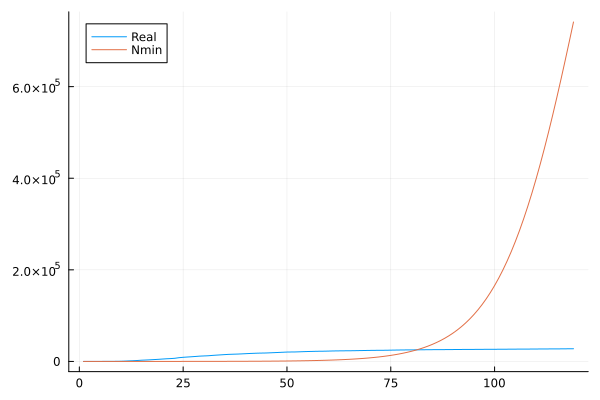

In [166]:
plot(1:tmax, [I.(1:tmax), [predict1(Nmax, x) for x in 1:tmax]],
label = ["Real" "Nmin" "Nmax"])

### b)

#### i)

In [167]:
function J2(n::Int)::Real
    a = 6/(tmax*(tmax+1)*(2*tmax+1))
    s1(t::Int) = abs(log((I(t)*(n - I(0))) / (I(0)*(n - I(t)))))^2
    s2(t::Int) =   t*log((I(t)*(n - I(0))) / (I(0)*(n - I(t))))
    r = sum(s1, 1:tmax) - a*(sum(s2, 1:tmax))^2
    return r
end
    

J2 (generic function with 1 method)

In [168]:
using OrderedCollections
J_dict = OrderedDict()
for x in 0:20
    n = Nmin + x;
    a = J2(n);
    x != 0 && (a > J_dict[n-1]) && break
    J_dict[n] = a;
end


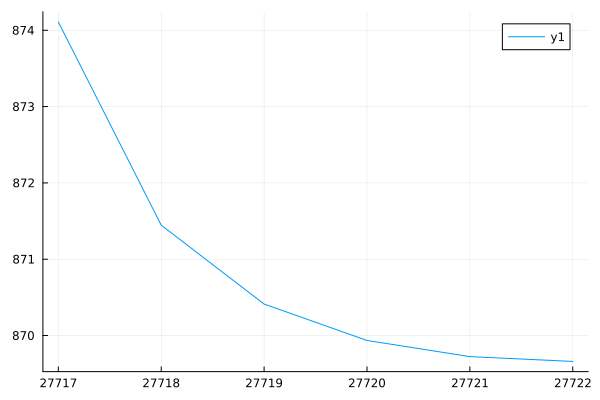

In [169]:
plot(collect(keys(J_dict)), collect(values(J_dict)))

Chosen $N = 27722$


x = Nmin:1:N
plot(x, J2.(x))

In [170]:
function beta_n(n)
    a = (6/(tmax*(tmax + 1)*(2*tmax + 1)))
    s1(t::Int) = t*log((I(t)*(n - I(0))) / (I(0)*(n - I(t))))
    r = a*sum(s1, 1:tmax)
    return r
end

beta_n (generic function with 1 method)

#### ii)

In [171]:
for n in collect(keys(J_dict))
    println("N = $(n), Beta = $(beta_n(n)), J(N, beta) = $(J(n, beta_n(n)))")
end

N = 27717, Beta = 0.13807405982926169, J(N, beta) = 874.1086923318926
N = 27718, Beta = 0.13791749425672672, J(N, beta) = 871.4460941052558
N = 27719, Beta = 0.13782116238725073, J(N, beta) = 870.4123166790648
N = 27720, Beta = 0.1377495196610878, J(N, beta) = 869.9350949181711
N = 27721, Beta = 0.13769142625603764, J(N, beta) = 869.7233379562639
N = 27722, Beta = 0.13764191977787016, J(N, beta) = 869.6605870788865


#### iii)

In [173]:
chosen_n = collect(keys(J_dict))[end]

27722

In [174]:
predicted2 = predict1.(chosen_n, 0:tmax, beta_n(chosen_n));

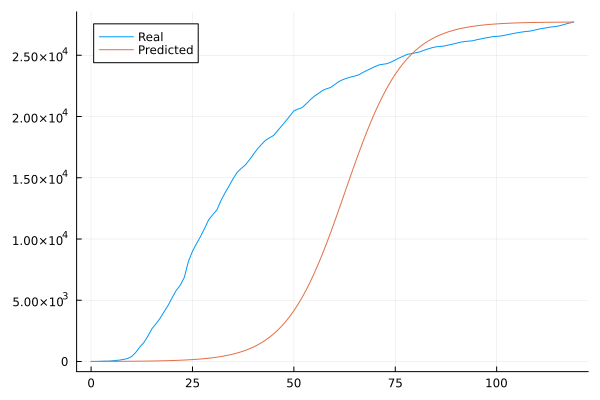

In [175]:
plot(0:tmax, [I.(0:tmax), predicted2], labels=["Real" "Predicted"])

#### iv)

In [ ]:
x = Nmin:100:Nmax
y = J2.(Nmin:100:Nmax);

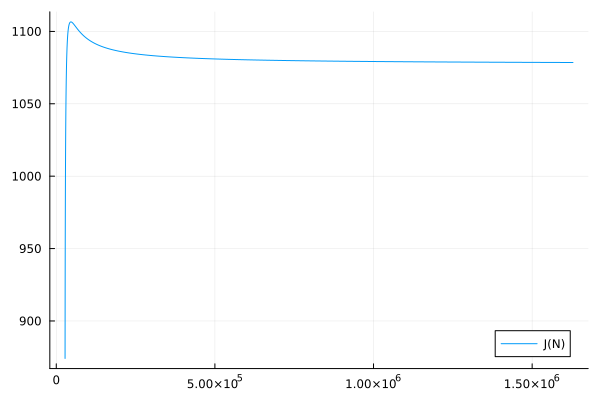

In [ ]:
plot(x, y, labels = "J(N)")

Based on plot we can see that the min N will have to be less than around 100,000, running the search on every possible N took too long so we will narrow down the search

In [ ]:
min_j = J2(Nmin);
min_n = Nmin;
for x in Nmin:(Nmin+100000)
    curr = J2(x);
    if curr < min_j
        min_j = curr;
        min_n = x;
    end
end

In [178]:
println("The minimum on this interval is at N = $(min_n)")

The minimum on this interval is at N = 27722


This is the same N as we got before in part (b.ii)

### c)

In [172]:
function Ideal(n, b)
s1(t::Int) = (I(t) - ((n*I(0)) / (I(0) + (n - I(0))*exp(-b*t))))^2
r = sum(s1, 0:tmax)
return r
end


Ideal (generic function with 1 method)

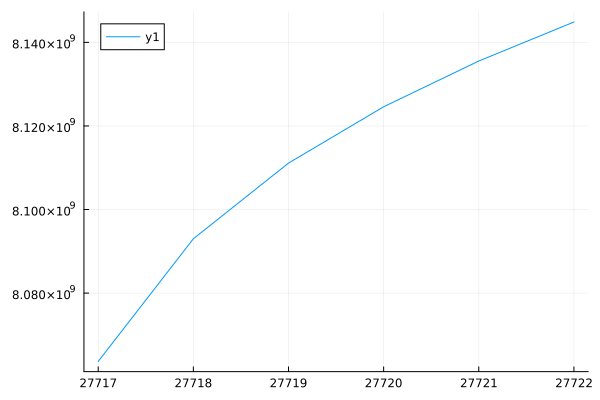

In [176]:
x = collect(keys(J_dict))
plot(x, Ideal.(x, beta_n.(x)))

This does not match the findings in (b.ii), now the minimum is at N = 27717 = Nmin unlike before in part (b.ii) where it was N = 27722

# Exercise 2

In [ ]:
new_vt = values(df[1, 13:end]); # include values before t0 >=5

## 1)

In [ ]:
τ = 7;
v(t::Int) = new_vt[t];
# rate of active infection 
function I2(t::Int)::Real
    t0 = 46;
    return v(t+t0+τ) - v(t+t0-τ)
end

I2 (generic function with 1 method)

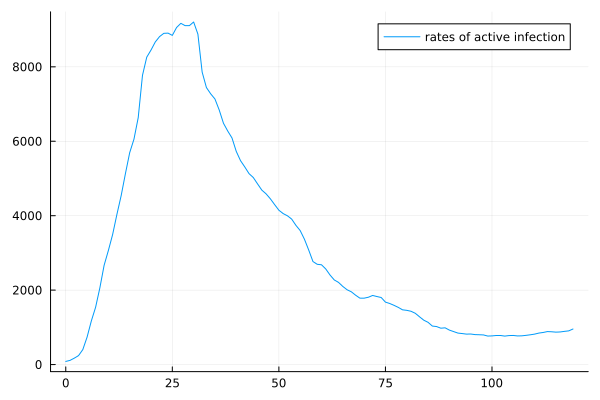

In [ ]:
plot(0:tmax, I2.(0:tmax), labels = "rates of active infection")

## 2)

In [ ]:
# Euler scheme
function euler(alpha, beta, N)
  h = 0.01;

  I_sim = zeros(tmax+1);

  s = N;
  i = I2(0);
  r = 0;

  t = 0
  while t < tmax + 0.0001
    if abs(round(Int, t) - t) < 0.0001
      I_sim[round(Int, t)+1] = i; 
    end

    ds = -beta*s*(i/N);
    di = beta*s*(i/N) - alpha*i;
    dr = alpha*i;
  
    s += h*ds;
    i += h*di;
    r += h*dr;
    t += h;
  end

  return I_sim
end

euler (generic function with 1 method)

## 3)

In [ ]:
# J(alpha, beta, N)
function J3(I_sim)
  s1(t) = (I2(t) - I_sim[t+1])^2;
  return sum(s1, 0:tmax)
end

J3 (generic function with 2 methods)

In [ ]:
# run the Euler scheme for each element of omega and save the resulting J(alpha, beta, N) value
triplets = Dict();

for alpha in [1/10, 1/9, 1/8, 1/7, 1/6, 1/5]
    for beta in (0.8:0.1:1.6)*alpha
        for N in (1:10)*(Nmax/10)
            triplets[(alpha, beta, N)] = J3(euler(alpha, beta, N));
        end
    end
end

## 4)

In [ ]:
# not showing figure when in a for loop for some reason
for alpha in [1/10, 1/9, 1/8, 1/7, 1/6, 1/5]
    f_plot(beta, N) = triplets[(alpha, beta, N)];
    surface((0.8:0.1:1.6)*alpha, (1:10)*(Nmax/10), f_plot)
end


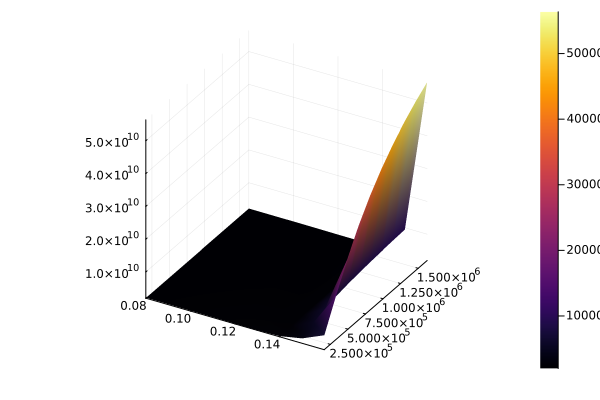

In [ ]:
# example of one plot
alpha = 1/10;

f_plot(beta, N) = triplets[(alpha, beta, N)];
surface((0.8:0.1:1.6)*alpha, (1:10)*(Nmax/10), f_plot)

In [ ]:
# compute alpha, beta, N that minimize J(alpha, beta, N)
min_j = triplets[(1/10, 1/10, Nmax)];
min_alpha = 1/10;
min_beta = 1/10;
min_N = Nmax;

for alpha in [1/10, 1/9, 1/8, 1/7, 1/6, 1/5]
    for beta in (0.8:0.1:1.6)*alpha
        for N in (1:10)*(Nmax/10)
            if triplets[(alpha, beta, N)] < min_j
                min_j = triplets[(alpha, beta, N)]
                min_alpha = alpha;
                min_beta = beta;
                min_N = N;
            end
        end
    end
end

println("Minimum value of J(alpha, beta, N) occurs at alpha = $(min_alpha), beta = $(min_beta), N = $(min_N)")

Minimum value of J(alpha, beta, N) occurs at alpha = 0.2, beta = 0.24000000000000002, N = 162870.6
